In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

#### Import data from csv

In [3]:
data= pd.read_csv("C:/Users/umair/Downloads/MLE_Task_GfK/testset_C.csv", sep = ';')
data


,id,productgroup,main_text,add_text,manufacturer
0,26229701,WASHINGMACHINES,WAQ284E25,WASCHMASCHINEN,BOSCH
1,16576864,USB MEMORY,LEEF IBRIDGE MOBILE SPEICHERERWEITERUNG FUER I...,PC__1100COMPUTINGMEMORY__1110MEMORYCARDS,LEEF
2,26155618,USB MEMORY,SANDISK 32GB ULTRA FIT USB 3.0,W1370,NaN
3,25646138,BICYCLES,HOLLANDRAD DAMEN 28 ZOLL TUSSAUD 3-GAENGE RH 5...,FAHRRAEDER // SPORTFAHRRAEDER,SCHALOW & KROH GMBH
4,19764614,BICYCLES,DAHON SPEED D7 SCHWARZ ? FALTRAD,SPORTS__30000WHEELED__30070BIKES,DAHON
...,...,...,...,...,...
7995,61028716,BICYCLES,TOPSY KINDERRAD 12 1/2 POLARWEISS O O O 419640,H006W0792344__WERKZEUG_AUTO/FAHRRAD_FAHRRAEDER,SI-ZWEIRAD-VERTRIEBS GMBH
7996,37734138,BICYCLES,CREME ECHO SOLO 16-SPEED WHITE,FAHRRAEDER>>RENNRAEDER>>RENNRAEDER,CREME
7997,17891755,CONTACT LENSES,"ACUVUE 1-DAY MOIST TAGESLINSEN WEICH, 30 STUEC...",HEALTH&PERSONALCARE__3100OPTICS__3101SPHERICCO...,JOHNSON & JOHNSON
7998,42298563,BICYCLES,UNIVEGA TERRENO 1.0 HE MATTBLAUGRAU 45 CM,1_7_4,UNIVEGA


#### Preprocessing and data overview

In [4]:
data = data.rename(columns={"productgroup": "product_group"})


In [5]:
data.product_group.value_counts().to_frame()


,product_group
WASHINGMACHINES,2000
USB MEMORY,2000
BICYCLES,2000
CONTACT LENSES,2000


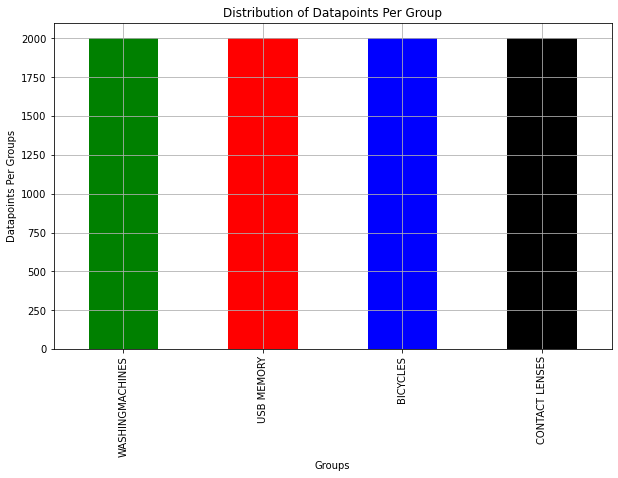

In [7]:
category_dist = data['product_group'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['g', 'r', 'b', 'k']
category_dist.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("Groups")
plt.ylabel("Datapoints Per Groups")
plt.title("Distribution of Datapoints Per Group")
plt.show()

In [9]:
data['main_text'].isnull().sum()

2

In [10]:
data['add_text'].isnull().sum()


0

In [11]:
data['product_group'].isnull().sum()


0

In [12]:
data[data['main_text'].isna()]


,id,product_group,main_text,add_text,manufacturer
5843,36969666,WASHINGMACHINES,NaN,UNASSIGNED,NaN
6901,25724126,USB MEMORY,NaN,SPEICHERKARTEN->USB STICK->,TRANSCEND


In [13]:
data['text'] = data['main_text'] + ' ' + data['add_text']
data

,id,product_group,main_text,add_text,manufacturer,text
0,26229701,WASHINGMACHINES,WAQ284E25,WASCHMASCHINEN,BOSCH,WAQ284E25 WASCHMASCHINEN
1,16576864,USB MEMORY,LEEF IBRIDGE MOBILE SPEICHERERWEITERUNG FUER I...,PC__1100COMPUTINGMEMORY__1110MEMORYCARDS,LEEF,LEEF IBRIDGE MOBILE SPEICHERERWEITERUNG FUER I...
2,26155618,USB MEMORY,SANDISK 32GB ULTRA FIT USB 3.0,W1370,NaN,SANDISK 32GB ULTRA FIT USB 3.0 W1370
3,25646138,BICYCLES,HOLLANDRAD DAMEN 28 ZOLL TUSSAUD 3-GAENGE RH 5...,FAHRRAEDER // SPORTFAHRRAEDER,SCHALOW & KROH GMBH,HOLLANDRAD DAMEN 28 ZOLL TUSSAUD 3-GAENGE RH 5...
4,19764614,BICYCLES,DAHON SPEED D7 SCHWARZ ? FALTRAD,SPORTS__30000WHEELED__30070BIKES,DAHON,DAHON SPEED D7 SCHWARZ ? FALTRAD SPORTS__30000...
...,...,...,...,...,...,...
7995,61028716,BICYCLES,TOPSY KINDERRAD 12 1/2 POLARWEISS O O O 419640,H006W0792344__WERKZEUG_AUTO/FAHRRAD_FAHRRAEDER,SI-ZWEIRAD-VERTRIEBS GMBH,TOPSY KINDERRAD 12 1/2 POLARWEISS O O O 41964...
7996,37734138,BICYCLES,CREME ECHO SOLO 16-SPEED WHITE,FAHRRAEDER>>RENNRAEDER>>RENNRAEDER,CREME,CREME ECHO SOLO 16-SPEED WHITE FAHRRAEDER>>REN...
7997,17891755,CONTACT LENSES,"ACUVUE 1-DAY MOIST TAGESLINSEN WEICH, 30 STUEC...",HEALTH&PERSONALCARE__3100OPTICS__3101SPHERICCO...,JOHNSON & JOHNSON,"ACUVUE 1-DAY MOIST TAGESLINSEN WEICH, 30 STUEC..."
7998,42298563,BICYCLES,UNIVEGA TERRENO 1.0 HE MATTBLAUGRAU 45 CM,1_7_4,UNIVEGA,UNIVEGA TERRENO 1.0 HE MATTBLAUGRAU 45 CM 1_7_4


In [14]:
df=data.dropna(subset=['text'])
df

,id,product_group,main_text,add_text,manufacturer,text
0,26229701,WASHINGMACHINES,WAQ284E25,WASCHMASCHINEN,BOSCH,WAQ284E25 WASCHMASCHINEN
1,16576864,USB MEMORY,LEEF IBRIDGE MOBILE SPEICHERERWEITERUNG FUER I...,PC__1100COMPUTINGMEMORY__1110MEMORYCARDS,LEEF,LEEF IBRIDGE MOBILE SPEICHERERWEITERUNG FUER I...
2,26155618,USB MEMORY,SANDISK 32GB ULTRA FIT USB 3.0,W1370,NaN,SANDISK 32GB ULTRA FIT USB 3.0 W1370
3,25646138,BICYCLES,HOLLANDRAD DAMEN 28 ZOLL TUSSAUD 3-GAENGE RH 5...,FAHRRAEDER // SPORTFAHRRAEDER,SCHALOW & KROH GMBH,HOLLANDRAD DAMEN 28 ZOLL TUSSAUD 3-GAENGE RH 5...
4,19764614,BICYCLES,DAHON SPEED D7 SCHWARZ ? FALTRAD,SPORTS__30000WHEELED__30070BIKES,DAHON,DAHON SPEED D7 SCHWARZ ? FALTRAD SPORTS__30000...
...,...,...,...,...,...,...
7995,61028716,BICYCLES,TOPSY KINDERRAD 12 1/2 POLARWEISS O O O 419640,H006W0792344__WERKZEUG_AUTO/FAHRRAD_FAHRRAEDER,SI-ZWEIRAD-VERTRIEBS GMBH,TOPSY KINDERRAD 12 1/2 POLARWEISS O O O 41964...
7996,37734138,BICYCLES,CREME ECHO SOLO 16-SPEED WHITE,FAHRRAEDER>>RENNRAEDER>>RENNRAEDER,CREME,CREME ECHO SOLO 16-SPEED WHITE FAHRRAEDER>>REN...
7997,17891755,CONTACT LENSES,"ACUVUE 1-DAY MOIST TAGESLINSEN WEICH, 30 STUEC...",HEALTH&PERSONALCARE__3100OPTICS__3101SPHERICCO...,JOHNSON & JOHNSON,"ACUVUE 1-DAY MOIST TAGESLINSEN WEICH, 30 STUEC..."
7998,42298563,BICYCLES,UNIVEGA TERRENO 1.0 HE MATTBLAUGRAU 45 CM,1_7_4,UNIVEGA,UNIVEGA TERRENO 1.0 HE MATTBLAUGRAU 45 CM 1_7_4


#### Vectorization of textual data for model training

In [15]:
count_vec = CountVectorizer()
bow = count_vec.fit_transform(df['text'])
bow = np.array(bow.todense())
bow.shape

(7998, 8424)

In [16]:
print(count_vec.vocabulary_)

{'waq284e25': 7706, 'waschmaschinen': 7758, 'leef': 5281, 'ibridge': 4778, 'mobile': 5610, 'speichererweiterung': 6764, 'fuer': 4335, 'iphone': 4860, 'ipad': 4859, 'und': 7371, 'ipod': 4861, 'mit': 5599, 'lightning': 5332, 'usb': 7405, '128': 330, 'gb': 4383, 'pc__1100computingmemory__1110memorycards': 5955, 'sandisk': 6428, '32gb': 1115, 'ultra': 7351, 'fit': 4190, 'w1370': 7604, 'hollandrad': 4710, 'damen': 3511, '28': 948, 'zoll': 8367, 'tussaud': 7272, 'gaenge': 4367, 'rh': 6316, '54': 1605, 'cm': 3313, 'schwarz': 6511, 'bellefleur': 2958, 'fahrraeder': 4099, 'sportfahrraeder': 6813, 'dahon': 3501, 'speed': 6755, 'd7': 3492, 'faltrad': 4103, 'sports__30000wheeled__30070bikes': 6818, 'pny': 6061, '16gb': 600, 'lego': 5287, 'flash': 4223, 'drive': 3718, 'bric': 3094, 'component': 3362, '__': 2571, 'memory': 5522, 'citybike': 3248, 'colors': 3345, 'inkl': 4832, 'korb': 5091, 'stand': 6841, 'var': 7462, 'city': 3247, 'bikes': 3007, '126': 321, 'bike': 3002, '3gang': 1243, 'weiss': 7914

#### Split data into train and test parts

In [17]:
X = bow
y = df['product_group']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [20]:
print("NUMBER OF DATA POINTS IN TRAIN DATA :", X_train.shape[0])
print("NUMBER OF DATA POINTS IN TEST DATA :", X_test.shape[0])

NUMBER OF DATA POINTS IN TRAIN DATA : 5598
NUMBER OF DATA POINTS IN TEST DATA : 2400


#### Train a Navie Bayes model for Product classification

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
model = MultinomialNB().fit(X_train, y_train)

In [26]:
y_pred = model.predict(X_test)

In [27]:
with open('model.classification', 'wb') as f:
    pickle.dump((count_vec, model), f)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy -",accuracy)

Naive Bayes Train Accuracy - 0.9975


In [36]:
f1 = f1_score(y_test, y_pred, average="macro")
print("Naive Bayes F1 score -",f1)

Naive Bayes F1 score - 0.9975013614444141


In [31]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

       BICYCLES       1.00      0.99      1.00       600
 CONTACT LENSES       0.99      1.00      1.00       600
     USB MEMORY       1.00      1.00      1.00       600
WASHINGMACHINES       1.00      1.00      1.00       600

       accuracy                           1.00      2400
      macro avg       1.00      1.00      1.00      2400
   weighted avg       1.00      1.00      1.00      2400



#### Plot Confusion, Recall and Precision Matrix

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(y_test, y_pred):

    C = confusion_matrix(y_test, y_pred) #confusion_matrix
    R =(((C.T)/(C.sum(axis=1))).T) #recall_matrix
    P =(C/C.sum(axis=0)) #precision_matrix
    
    labels = [1,2,3,4]
    
    #representing_C_in_heatmap_format
    print("-"*40, "Confusion Matrix", "-"*40)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_P_in_heatmap_format
    print("-"*40, "Precision Matrix (Columm Sum=1)", "-"*40)
    plt.figure(figsize=(20,7))
    sns.heatmap(P, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_R_in_heatmap_format
    print("-"*40, "Recall Matrix (Row Sum=1)", "-"*40)
    plt.figure(figsize=(20,7))
    sns.heatmap(R, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

---------------------------------------- Confusion Matrix ----------------------------------------


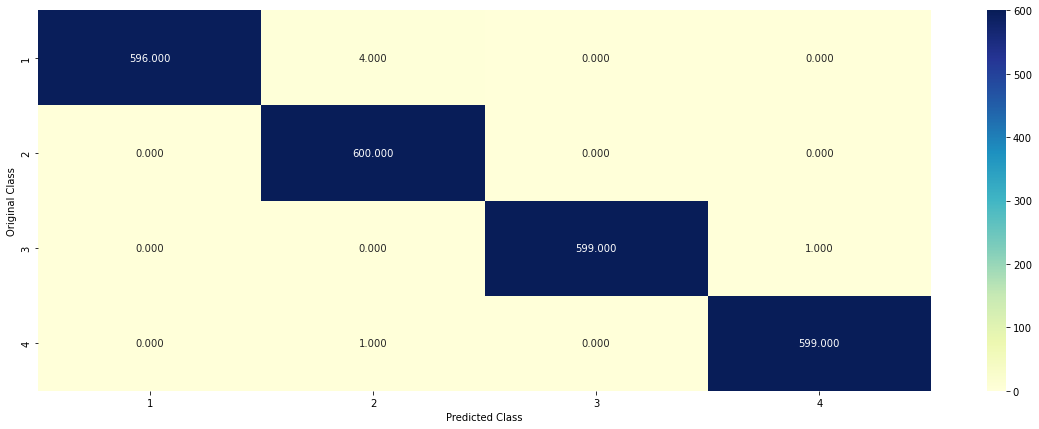

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


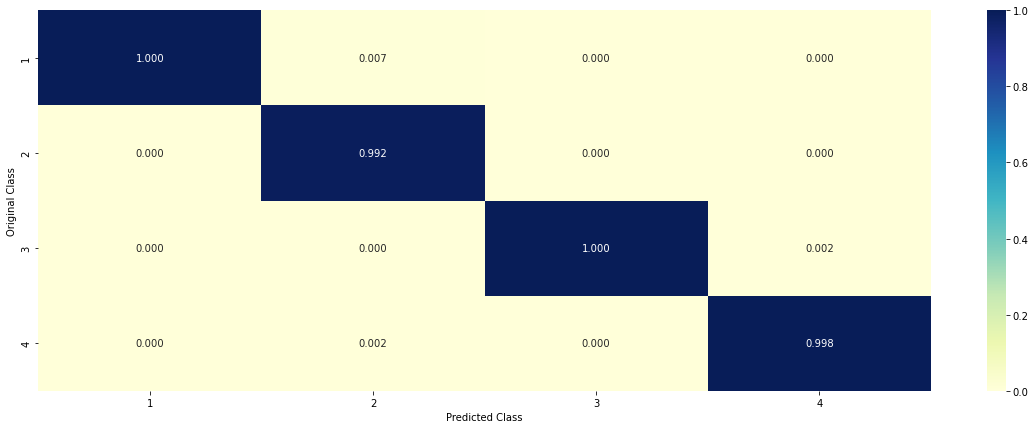

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


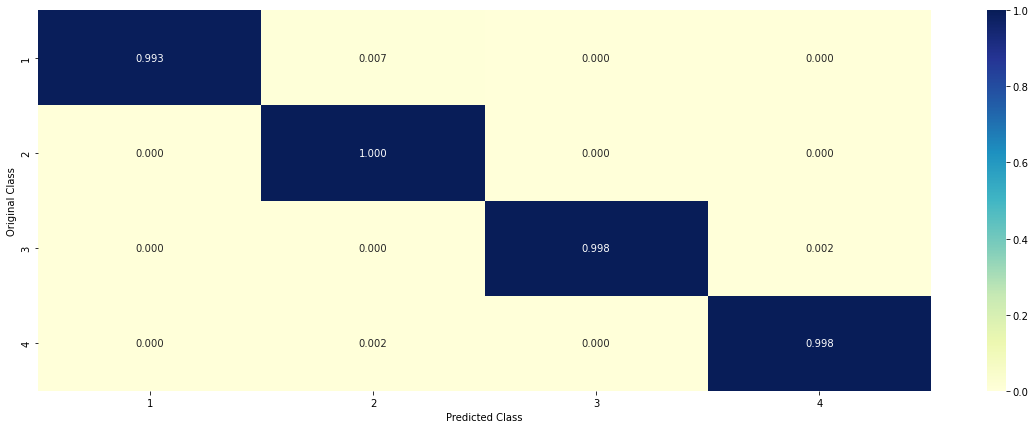

In [38]:
plot_confusion_matrix(y_test, y_pred)

#### Map a predicted class to every row for checking the model output

In [25]:
results = pd.DataFrame(data={'predicted': y_pred, 'actual': y_test})
results['result'] = np.where(results['predicted']==results['actual'], 1, 0)
results.sort_values(by='result').head(20)

,predicted,actual,result
5245,CONTACT LENSES,WASHINGMACHINES,0
13,BICYCLES,WASHINGMACHINES,0
7451,CONTACT LENSES,BICYCLES,0
4710,CONTACT LENSES,USB MEMORY,0
4841,CONTACT LENSES,BICYCLES,0
6616,WASHINGMACHINES,WASHINGMACHINES,1
4894,USB MEMORY,USB MEMORY,1
4337,WASHINGMACHINES,WASHINGMACHINES,1
1430,USB MEMORY,USB MEMORY,1
2234,WASHINGMACHINES,WASHINGMACHINES,1
